# Red Wine Quality EDA

## Loading Libraries & Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
red_wine_data = pd.read_csv('winequality-red.csv', sep=";")


## Data Analysis Techniques

### Initial Review

In [3]:
red_wine_data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
red_wine_data.tail(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [5]:
red_wine_data.shape

(1599, 12)

In [6]:
red_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Exploring the Features

In [7]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# Display the unique values of the target variable (quality)
red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Observations:
- Few key insights just by looking at the target variable are as follows:

1. Target variable/Dependent variable is discrete and categorical in nature.
2. “quality” score scale ranges from 1 to 10; 1 being poor and 10 being the best.
3. 1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8.

In [9]:
# Frequency count of each quality value (counts the occurrence of each value in the column)
red_wine_data['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Observations:
- This tells us the vote count of each quality score in descending order.
- “quality” has most values concentrated in the categories 5, 6 and 7.
- Only a few observations made for the categories 3 & 8.

In [10]:
# Renaming the columns: rename the columns with spaces in their names to remove the spaces
red_wine_data.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid',
                     'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'},
                       inplace=True)


### Checking for Missing Values

- df.isna() returns the dataframe with boolean values indicating missing values.
- You can also choose to use notna() which is just the opposite of isna().
- df.isna().any() returns a boolean value for each column. If there is at least one missing value in that column, the result is True.
- df.isna().sum() returns the number of missing values in each column.

In [11]:
red_wine_data.isna()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free_sulfur_dioxide  total_sulfur_dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
1594                False                 False    False  False      False   
1595                False                 False    False  False      False   
1596                False                 False    False  False      False   
1597                False                 False    False  False      False   
1598                False                 False    False  False      False   

      alcohol  quality  
0       False    False  
1       False    False  
2       False    False  
3       False    False  
4       False    False  
...       ...      ...  
1594    False    False  
1595    False    False  
1596    False    False  
1597    False    False  
1598    False    False  

[1599 rows x 12 columns]

In [12]:
red_wine_data.notna()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              True              True         True            True       True   
1              True              True         True            True       True   
2              True              True         True            True       True   
3              True              True         True            True       True   
4              True              True         True            True       True   
...             ...               ...          ...             ...        ...   
1594           True              True         True            True       True   
1595           True              True         True            True       True   
1596           True              True         True            True       True   
1597           True              True         True            True       True   
1598           True              True         True            True       True   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    True                  True     True  True       True   
1                    True                  True     True  True       True   
2                    True                  True     True  True       True   
3                    True                  True     True  True       True   
4                    True                  True     True  True       True   
...                   ...                   ...      ...   ...        ...   
1594                 True                  True     True  True       True   
1595                 True                  True     True  True       True   
1596                 True                  True     True  True       True   
1597                 True                  True     True  True       True   
1598                 True                  True     True  True       True   

      alcohol  quality  
0        True     True  
1        True     True  
2        True     True  
3        True     True  
4        True     True  
...       ...      ...  
1594     True     True  
1595     True     True  
1596     True     True  
1597     True     True  
1598     True     True  

[1599 rows x 12 columns]

In [13]:
red_wine_data.isna().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [14]:
red_wine_data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Checking for Duplicates

In [16]:
duplicated_entries = red_wine_data[red_wine_data.duplicated()]
duplicated_entries.shape

(240, 12)

Observations:
- There are 240 duplicates. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.

## Graphical Techniques

### Data Visualization Libraries

In [33]:
# import libraries such as seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

- Separate the input and target variables by assigning them the values x and y respectively

In [28]:
# store the target variable (quality) in y
y = red_wine_data.quality

# store the input variables (other columns) in x by dropping all columns except quality, the target variable
x = red_wine_data.drop('quality', axis=1)  # axis=1 means along the columns


### Histogram & Bar Chart

- Histograms use bars to visualize data.
- The difference between histograms and bar charts is that:
    - Histogram - visualizes quantitative data and has no gaps between bars
    - Bar Chart - visualizes categorical data and has gaps between bars

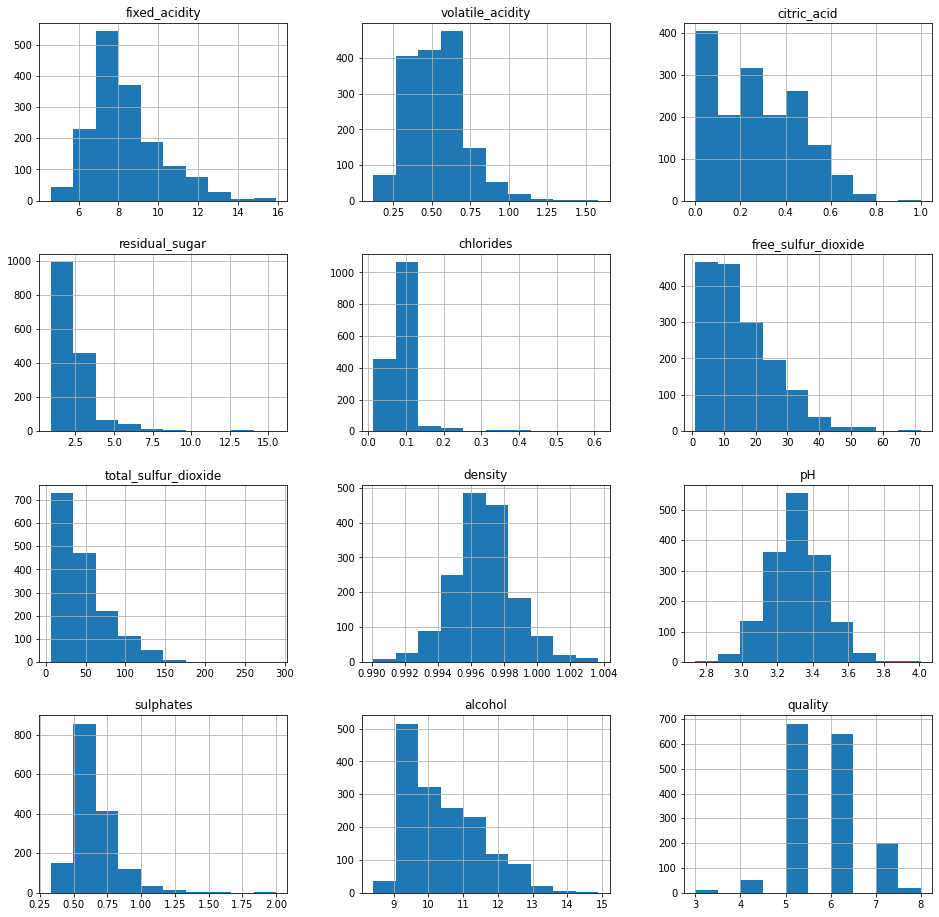

In [38]:
red_wine_data.hist(bins=10, figsize=(16, 16))
plt.show()


Observations:
- The distribution of the attribute “alcohol” seems to be positively skewed i.e the curve is shifted towards the left.
- The attributes 'density' and 'pH' are quite normally distributed.
- Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

### Correlation Matrix with Heatmap

- Correlation (checked using the corr() function) is a statistical measure that represents how multiple values relate with each other
- There are 3 types of correlation:
    1. Positive COrreleation: when the values of one variable increases, the values of the other variable increases #directly proportional
    2. Negative Correlation: when the values of one variable increases, the values of the other variable decreases #inversely proportional
    3. No Correlation: change in the values of one variable does not affect the values of another variable #the variables do not relate with each other
- Each of these correlation types exists in a spectrum represented by values from -1 to +1.
    1. Slight or high positive correlation features can be like 0.5 or 0.7.
    2. A very strong and perfect positive correlation is represented by a correlation score of 0.9 or 1.
    3. If there is a strong negative correlation, it will be represented by a value of -0.9 or -1. 
    4. Values close to zero indicates no correlation.

In [39]:
red_wine_data.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual_sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free_sulfur_dioxide       -0.153794         -0.010504    -0.060978   
total_sulfur_dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.114777   0.093705            -0.153794   
volatile_acidity            0.001918   0.061298            -0.010504   
citric_acid                 0.143577   0.203823            -0.060978   
residual_sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free_sulfur_dioxide         0.187049   0.005562             1.000000   
total_sulfur_dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile_acidity                  0.076470  0.022026  0.234937  -0.260987   
citric_acid                       0.035533  0.364947 -0.541904   0.312770   
residual_sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free_sulfur_dioxide               0.667666 -0.021946  0.070377   0.051658   
total_sulfur_dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed_acidity        -0.061668  0.124052  
volatile_acidity     -0.202288 -0.390558  
citric_acid           0.109903  0.226373  
residual_sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free_sulfur_dioxide  -0.069408 -0.050656  
total_sulfur_dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<AxesSubplot:>

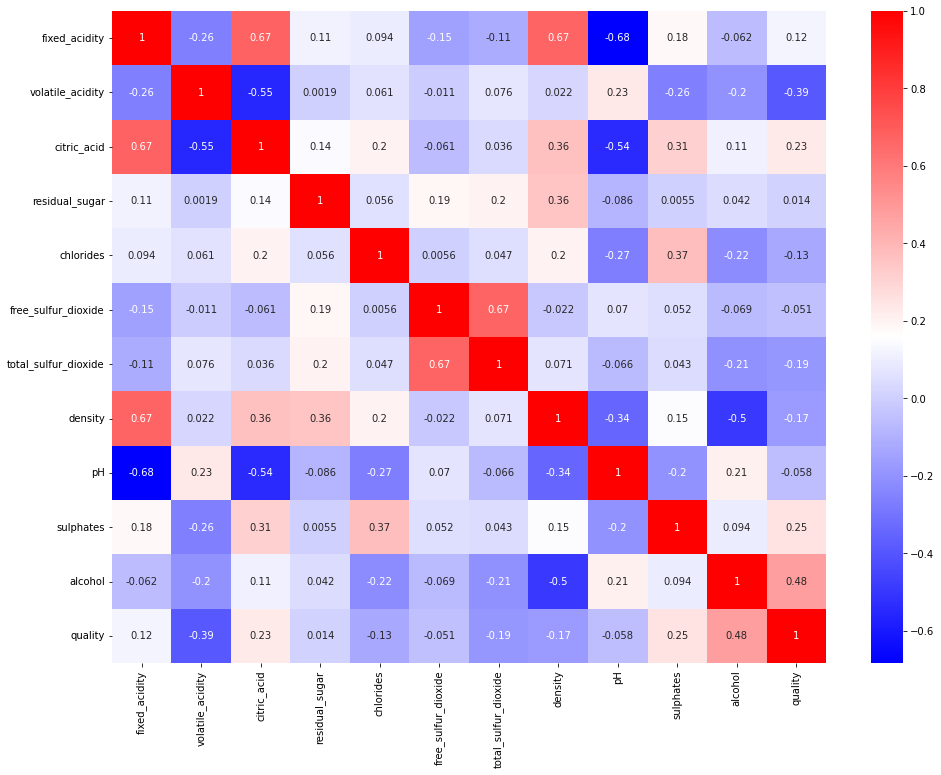

In [43]:
# create a new figure with width=16 inches and height=12 inches
plt.figure(figsize=(16, 12))

# provide the correlation matrix (red_wine_data.corr())
# cmap is the colormap which specifies the color; in this case, blue-white-red. Blue is for low values, white for intermediate values, and red for high values
# annot for annotations are text labels that are added to the plot to provide additional information about the data points
sb.heatmap(red_wine_data.corr(), cmap='bwr', annot=True)


Observations:
- Alcohol has the highest positive correlation with wine quality, followed by the various other variables such as acidity, sulphates, density & chlorides.
- There is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.
- There is a relatively high negative correlation between fixed_acidity and pH.
- Density has a strong positive correlation with fixed_acidity, whereas it has a strong negative correlation with alcohol.
- citric acid & volatile acidity have negative correlation.
- free sulphur dioxide & total sulphur dioxide have positive correlation.

### Count Plot

- Count plot is a graphical display to show the number of occurrences or frequencies for each categorical data using bars

c:\Users\Diana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

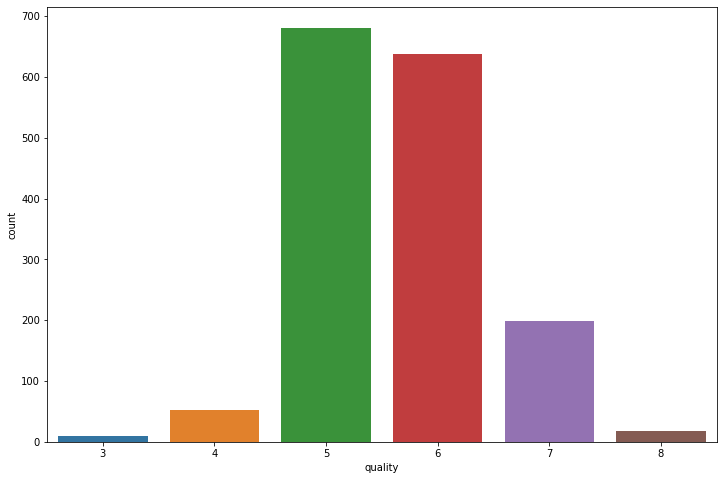

In [44]:
plt.figure(figsize=(12,8))
sb.countplot(red_wine_data.quality)

Observation:
- The average (5-7) quality of wines are more than bad (1-4) and good (8-10) quality of wines

### Pair Plot

- The pairplot had two basic figures: histogram and scatter plot.
- The histogram on the diagonal - allows us to see the distribution of a single variable
- The scatter plot on the upper and lower triangles - show the relationship (or lack thereof) between two variables
- It plots every numerical attribute against every other

- In this case (12 variables), it plots a 12*12 grid but the whole output is too huge to display

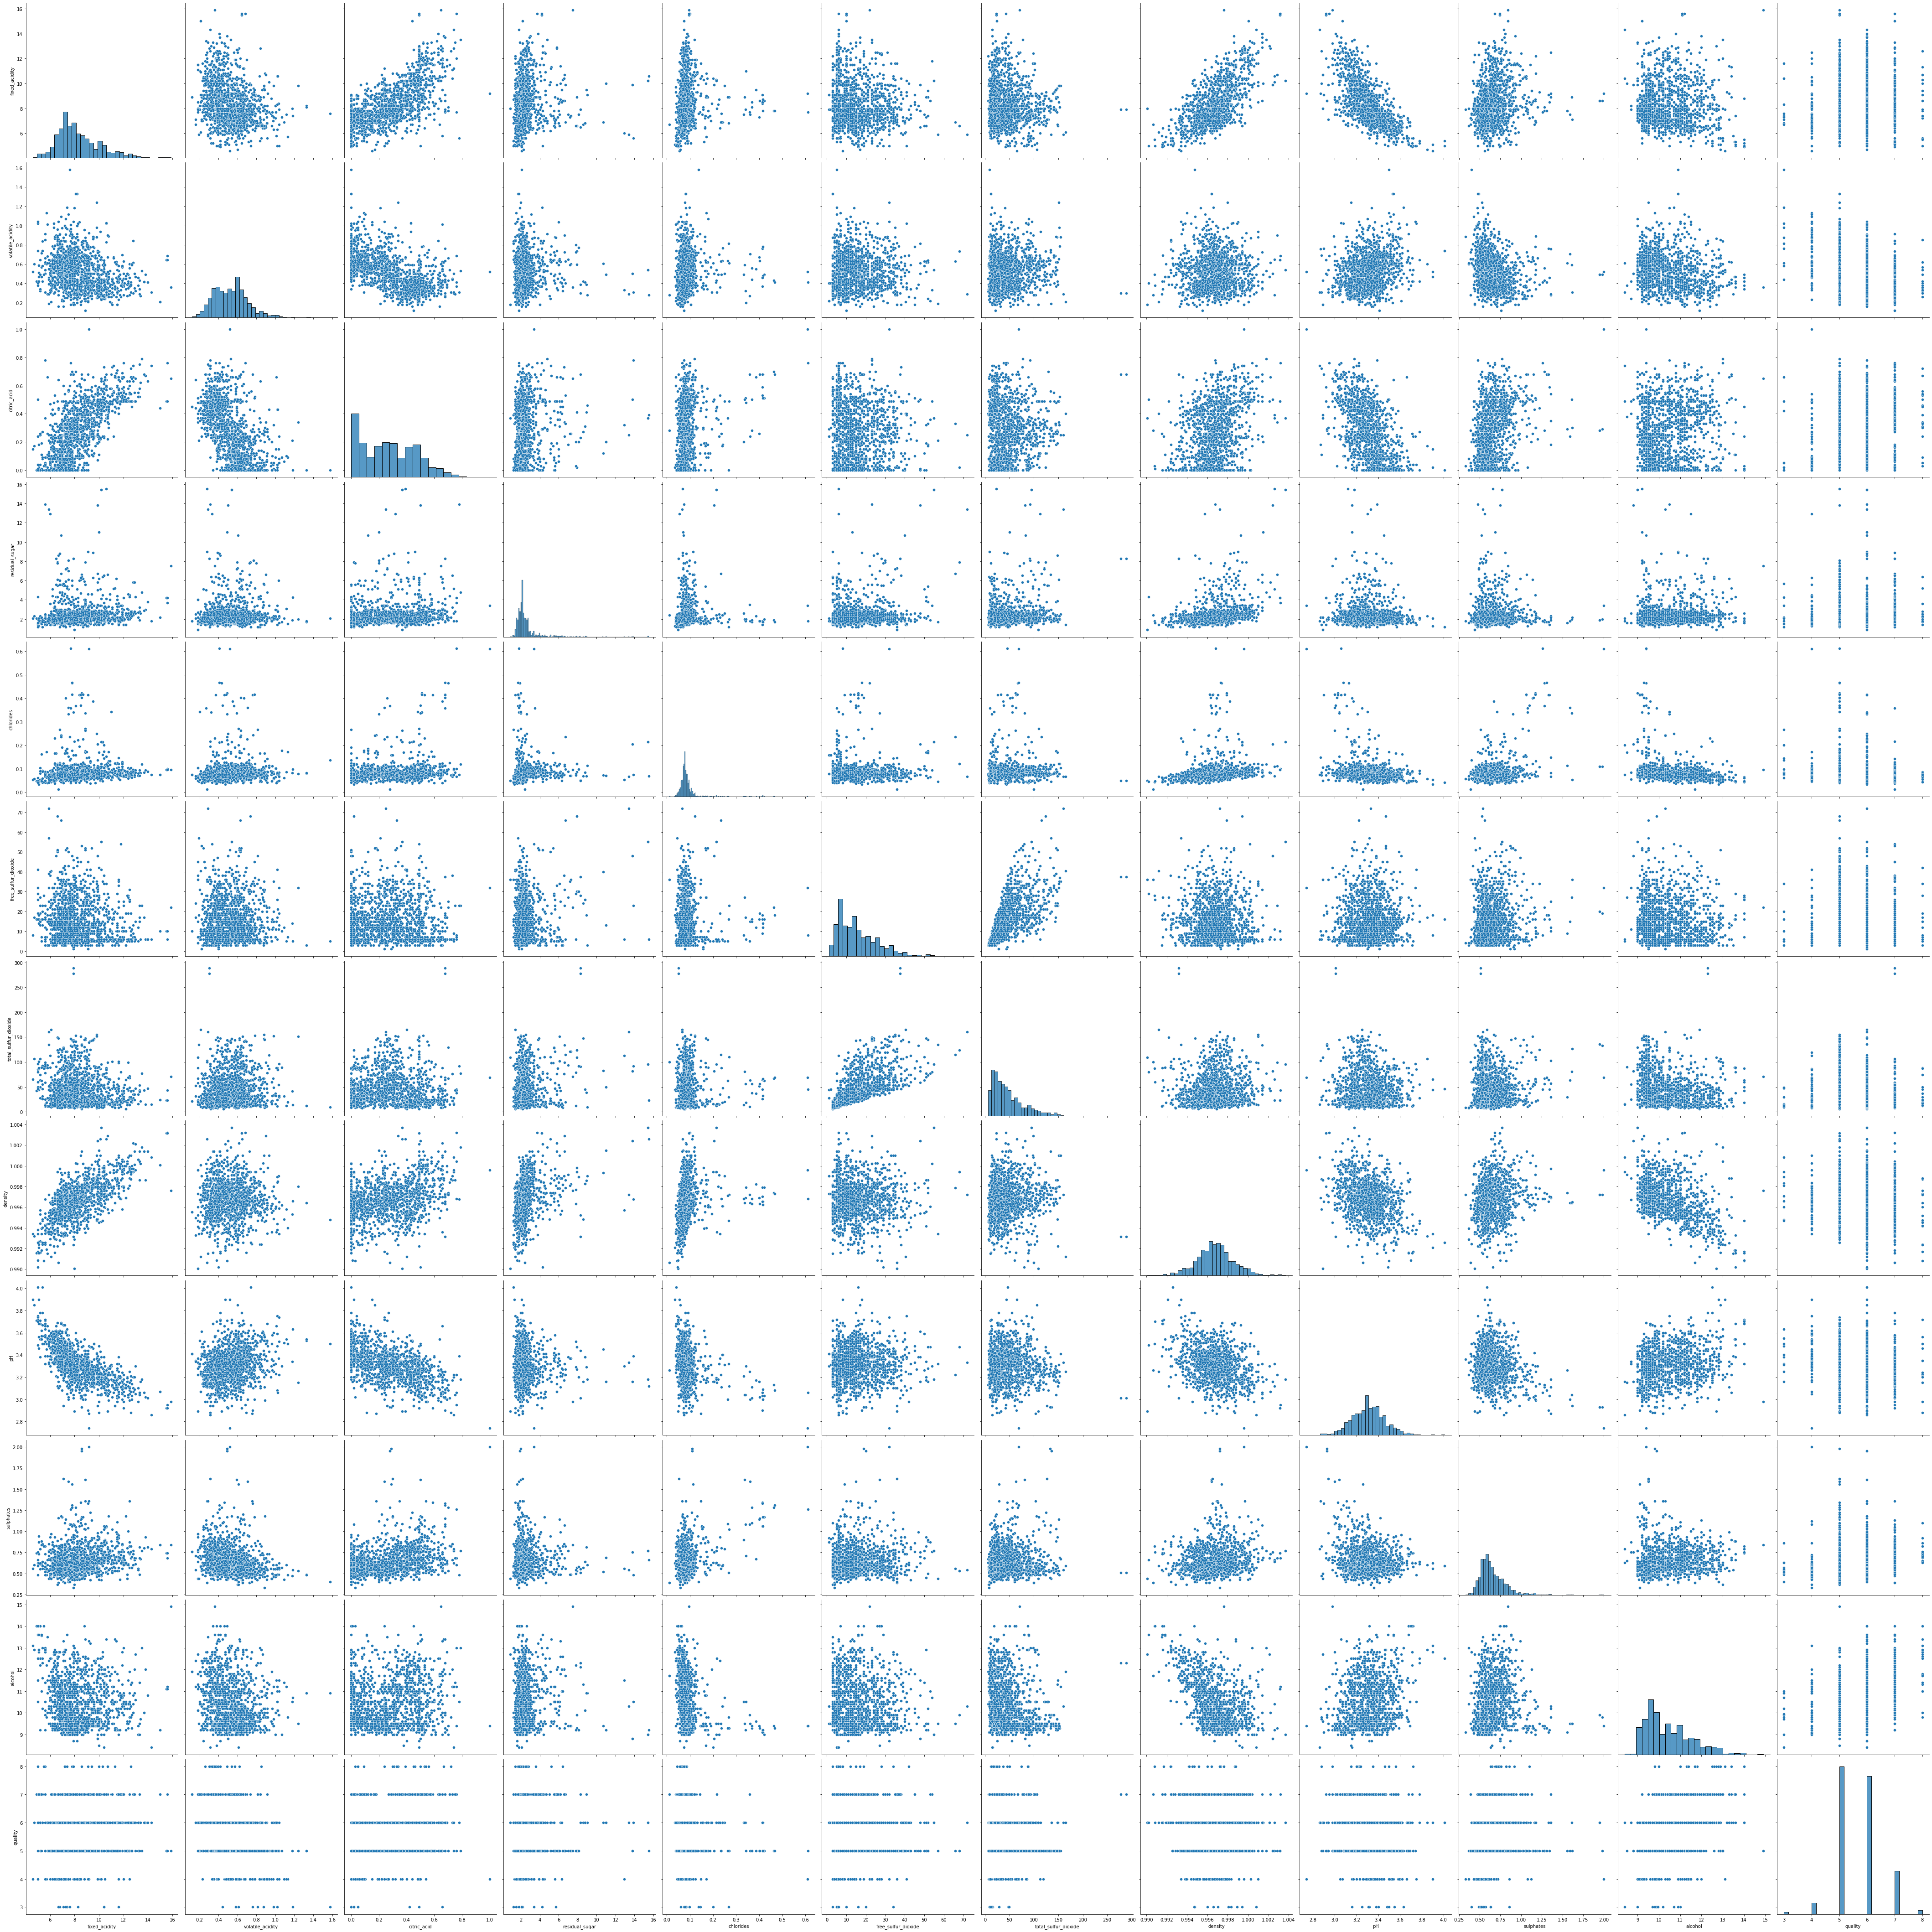

In [50]:
sb.pairplot(red_wine_data, height=5)

Observation:
- Looking at scatterplot for this pair of variables, we can see the positive linear correlation between these two variables. We can observe the upward trend, and also the points are not too dispersed.

### Box Plot

- A box plot is a great way to get a visual sense of an entire range of data. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

- Box plots divides data into its quartiles. The “box” shows a user the data set between the first and third quartiles.

- The median gets drawn somewhere inside the box and then you see the most extreme non-outliers to finish the plot. Those lines are known as the “whiskers”. If there are any outliers then those can be plotted as well.

- With box plots you can answer how diverse or uniform your data might be. You can identify what is normal and what is extreme. Box plots help give a shape to your data that is broad without sacrificing the ability to look at any piece and ask more questions.

- It displays the five-number summary of a set of data. The five-number summary is:
    1. minimum
    2. first quartile (Q1)
    3. median
    4. third quartile (Q3)
    5. maximum

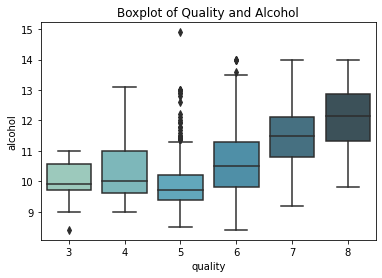

In [51]:
sb.boxplot(x=red_wine_data.quality, y=red_wine_data.alcohol, palette='GnBu_d') #color palette is green-blue diverging
plt.title("Boxplot of Quality and Alcohol")
plt.show()

Observation:
- The above plot shows the increase in the quality of wine with an increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine, the better will be the quality.
- Also, the points lying outside the whiskers(the lines extending from the rectangular box) are the outliers.

#  Quiz

In [17]:
# load the data 
exam_scores = pd.read_csv('exam_scores.csv')

#check the shape of the df
exam_scores.shape

(1000, 8)

In [18]:
exam_scores.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [19]:
exam_scores.describe()

math score  reading score  writing score
count  1000.000000     1000.00000    1000.000000
mean     67.128000       70.17400      68.973000
std      14.815367       14.85599      15.109155
min      15.000000       18.00000      10.000000
25%      58.000000       60.00000      59.000000
50%      67.000000       70.00000      69.000000
75%      78.000000       81.00000      80.000000
max     100.000000      100.00000     100.000000

In [20]:
exam_scores['gender'].unique()

array(['male', 'female'], dtype=object)

In [21]:
# find the number of missing values
exam_scores.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [22]:
exam_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [23]:
exam_scores['reading score'].isnull().sum()

0

In [24]:
exam_scores['reading score'].isnull().mean()

0.0

In [25]:
exam_scores['reading score'].value_counts()

59    32
74    32
63    31
73    30
61    28
      ..
36     1
26     1
29     1
30     1
18     1
Name: reading score, Length: 74, dtype: int64

In [26]:
exam_scores['reading score'].unique()

array([ 68,  65,  75,  77,  82,  78,  50,  58,  69,  39,  62,  60,  59,
        64,  74,  80,  40,  72,  63,  51,  48,  44,  85,  98,  55,  90,
        61,  89,  88,  94,  97,  76,  46,  53,  54,  81,  66,  73,  56,
        91,  86,  93,  45,  84,  70,  87,  71,  57,  52,  79,  42, 100,
        49,  83,  67,  43,  47,  35,  99,  95,  33,  32,  92,  41,  31,
        38,  96,  27,  37,  36,  26,  29,  30,  18], dtype=int64)

# Final Quiz

write the appropriate code to find answers to the following questions:

1. Select the correct statement about the titanic dataset:
- The 'Fare' feature has 0 missing values
- The no. of male passengers are more than female passengers

In [117]:
titanic = pd.read_csv('titanic.csv')
titanic.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

2. What is the proportion of passengers who survived?

In [62]:
titanic['Survived'].mean()

0.3838383838383838

3. What is the median Fare of the passengers?

In [63]:
titanic['Fare'].median()

14.4542

4. Select the correct option:
- Percentage of women survived was more than percentage of men survived
- It looks like first-class passengers were given priority to survive
- It looks like Children were given priority to survive
- All of the above

In [101]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [127]:
titanic = pd.read_csv('titanic.csv')
#titanic['Sex']=titanic['Sex'].map({'male':0,'female':1})
titanic.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [128]:
# Calculate the total number of men and women on the Titanic
men = titanic[titanic['Sex'] == 'male']['PassengerId'].count()
women = titanic[titanic['Sex'] == 'female']['PassengerId'].count()

# Calculate the total number of men and women who survived
survived_men = titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)]['PassengerId'].count()
survived_women = titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]['PassengerId'].count()

# Calculate the percentage of men and women who survived
percent_survived_men = (survived_men / men) * 100
percent_survived_women = (survived_women / women) * 100

# Print the percentage of men and women who survived
print(f"Percentage of men who survived: {percent_survived_men:.2f}%")
print(f"Percentage of women who survived: {percent_survived_women:.2f}%")

# Calculate the survival rate by passenger class
survival_by_class = titanic.groupby('Pclass')['Survived'].mean()

# Print the survival rate by passenger class
print("Survival rate by passenger class:")
print(survival_by_class)

# Calculate the survival rate by age group
bins = [0, 18, 35, 50, 100]
labels = ['Child', 'Young Adult', 'Middle-Aged', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
survival_by_age = titanic.groupby('AgeGroup')['Survived'].mean()

# Print the survival rate by age group
print("Survival rate by age group:")
print(survival_by_age)

Percentage of men who survived: 18.89%
Percentage of women who survived: 74.20%
Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survival rate by age group:
AgeGroup
Child          0.503597
Young Adult    0.382682
Middle-Aged    0.398693
Senior         0.343750
Name: Survived, dtype: float64


5. How many of the survived passengers had embarked from 'Southampton' i.e. 'S'?

In [111]:
# Calculate the survival rate by passenger Embarked
survival_by_embarked = titanic.groupby('Embarked')['Survived'].count()
survival_by_embarked 

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

6. Five highest fares of the passengers(not unique):

In [130]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [132]:
titanic['Fare'].max()

512.3292

In [137]:
titanic.sort_values(by='Fare', ascending=False)


PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
737          738         1       1              Lesurer, Mr. Gustave J   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
88            89         1       1          Fortune, Miss. Mabel Helen   
27            28         0       1      Fortune, Mr. Charles Alexander   
..           ...       ...     ...                                 ...   
633          634         0       1       Parr, Mr. William Henry Marsh   
413          414         0       2      Cunningham, Mr. Alfred Fleming   
822          823         0       1     Reuchlin, Jonkheer. John George   
732          733         0       2                Knight, Mr. Robert J   
674          675         0       2          Watson, Mr. Ennis Hastings   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  \
258  female  35.0      0      0  PC 17755  512.3292          NaN        C   
737    male  35.0      0      0  PC 17755  512.3292         B101        C   
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
88   female  23.0      3      2     19950  263.0000  C23 C25 C27        S   
27     male  19.0      3      2     19950  263.0000  C23 C25 C27        S   
..      ...   ...    ...    ...       ...       ...          ...      ...   
633    male   NaN      0      0    112052    0.0000          NaN        S   
413    male   NaN      0      0    239853    0.0000          NaN        S   
822    male  38.0      0      0     19972    0.0000          NaN        S   
732    male   NaN      0      0    239855    0.0000          NaN        S   
674    male   NaN      0      0    239856    0.0000          NaN        S   

        AgeGroup  
258  Young Adult  
737  Young Adult  
679  Middle-Aged  
88   Young Adult  
27   Young Adult  
..           ...  
633          NaN  
413          NaN  
822  Middle-Aged  
732          NaN  
674          NaN  

[891 rows x 13 columns]

7. Median age of the passengers is:

In [138]:
titanic['Age'].median()

28.0

8. Select the correct statement:
- There are 891 unique values in the Name column
- There are 714 unique values in the Name column

In [144]:
titanic['Name'].nunique()

891

9. Most of the passengers have _____ siblings/spouses.

In [148]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

10. Which of the following feature plays an important role in the survival of the passengers?
- Name
- Age
- Ticket

In [149]:
titanic.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000